In [6]:
!pip install -U pyarrow --quiet
!pip install datasets transformers torch seqeval evaluate aif360 --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.7/259.7 kB 5.9 MB/s eta 0:00:00


precission, recall, F1-score

In [ ]:
import torch
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Example demographic groups (race, gender)
demographics = {
    "Group 1": ["This is an example sentence for a white male.", "Another example for a white male."],
    "Group 2": ["This is an example sentence for a black female.", "Another example for a black female."],
    "Group 3": ["This is an example sentence for an Asian male.", "Another example for an Asian male."],
    "Group 4": ["This is an example sentence for a Hispanic female.", "Another example for a Hispanic female."]
}

def predict_bias(sentences):
    # Placeholder function - replace with your actual prediction logic
    return torch.randint(0, 2, (len(sentences),))

def evaluate_fairness(demographics):
    results = {}
    le = LabelEncoder()

    all_predictions = []
    all_true_labels = []

    for group, sentences in demographics.items():
        predictions = predict_bias(sentences)

        # Simulate ground truth labels - replace with actual labels in real scenario
        true_labels = torch.randint(0, 2, (len(sentences),))

        all_predictions.extend(predictions.numpy())
        all_true_labels.extend(true_labels.numpy())

        # Ensure both predictions and true_labels have the same labels
        unique_labels = np.unique(np.concatenate([predictions.numpy(), true_labels.numpy()]))
        le.fit(unique_labels)

        predictions_encoded = le.transform(predictions.numpy())
        true_labels_encoded = le.transform(true_labels.numpy())

        report = classification_report(true_labels_encoded, predictions_encoded,
                                       output_dict=True, zero_division=1)
        results[group] = report

    # Overall performance
    all_predictions_encoded = le.transform(all_predictions)
    all_true_labels_encoded = le.transform(all_true_labels)
    overall_report = classification_report(all_true_labels_encoded, all_predictions_encoded,
                                           output_dict=True, zero_division=1)
    results["Overall"] = overall_report

    return pd.DataFrame(results)

# Evaluate fairness across demographic groups
fairness_results = evaluate_fairness(demographics)
print(fairness_results)

                                                        Group 1  \
0             {'precision': 0.0, 'recall': 1.0, 'f1-score': ...   
1             {'precision': 1.0, 'recall': 0.0, 'f1-score': ...   
accuracy                                                    0.0   
macro avg     {'precision': 0.5, 'recall': 0.5, 'f1-score': ...   
weighted avg  {'precision': 1.0, 'recall': 0.0, 'f1-score': ...   

                                                        Group 2  \
0             {'precision': 1.0, 'recall': 0.5, 'f1-score': ...   
1             {'precision': 0.0, 'recall': 1.0, 'f1-score': ...   
accuracy                                                    0.5   
macro avg     {'precision': 0.5, 'recall': 0.75, 'f1-score':...   
weighted avg  {'precision': 1.0, 'recall': 0.5, 'f1-score': ...   

                                                        Group 3  \
0             {'precision': 0.0, 'recall': 0.0, 'f1-score': ...   
1             {'precision': 0.0, 'recall': 0.0, 'f1-score': 

ROC curve, AUC

Loading and preparing data...
Training model...
Making predictions...
Computing ROC curve and AUC...
Area Under the Curve (AUC): 0.95
Plotting ROC curve...


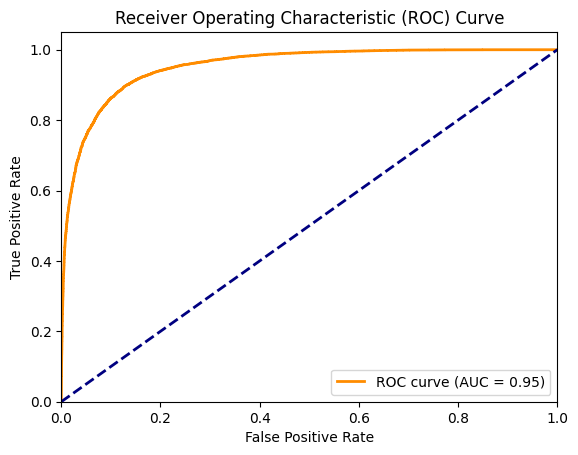


Example prediction:
Text: This movie was fantastic! I loved every minute of it.
Predicted probability of positive sentiment: 0.93


In [40]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from datasets import load_dataset

# Load IMDB dataset
def load_imdb_data():
    dataset = load_dataset("imdb")
    train_df = pd.DataFrame(dataset["train"])
    test_df = pd.DataFrame(dataset["test"])
    return train_df, test_df

# Prepare data
def prepare_data(train_df, test_df):
    X_train = train_df['text']
    y_train = train_df['label']
    X_test = test_df['text']
    y_test = test_df['label']

    vectorizer = TfidfVectorizer(max_features=5000)
    X_train_vectorized = vectorizer.fit_transform(X_train)
    X_test_vectorized = vectorizer.transform(X_test)

    return X_train_vectorized, y_train, X_test_vectorized, y_test, vectorizer

# Train model
def train_model(X_train, y_train):
    model = LogisticRegression(random_state=42, max_iter=1000)
    model.fit(X_train, y_train)
    return model

# Compute ROC curve and AUC
def compute_roc_auc(y_true, y_pred):
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)
    return fpr, tpr, roc_auc

# Plot ROC curve
def plot_roc_curve(fpr, tpr, roc_auc):
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

# Main function
def main():
    # Load and prepare data
    print("Loading and preparing data...")
    train_df, test_df = load_imdb_data()
    X_train, y_train, X_test, y_test, vectorizer = prepare_data(train_df, test_df)

    # Train model
    print("Training model...")
    model = train_model(X_train, y_train)

    # Make predictions
    print("Making predictions...")
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Compute ROC curve and AUC
    print("Computing ROC curve and AUC...")
    fpr, tpr, roc_auc = compute_roc_auc(y_test, y_pred_proba)

    # Print AUC
    print(f"Area Under the Curve (AUC): {roc_auc:.2f}")

    # Plot ROC curve
    print("Plotting ROC curve...")
    plot_roc_curve(fpr, tpr, roc_auc)

    # Example of using the model for prediction
    print("\nExample prediction:")
    example_text = "This movie was fantastic! I loved every minute of it."
    example_vectorized = vectorizer.transform([example_text])
    example_pred = model.predict_proba(example_vectorized)[0, 1]
    print(f"Text: {example_text}")
    print(f"Predicted probability of positive sentiment: {example_pred:.2f}")

if __name__ == "__main__":
    main()

Sensitivity (Recall) and Specificity

In [41]:
import numpy as np
from sklearn.metrics import confusion_matrix

def simulate_llm_predictions(num_samples=1000):
    """
    Simulate LLM predictions for sentiment analysis.
    Returns true labels and predicted labels.
    """
    # Simulate ground truth (0 for negative, 1 for positive)
    true_labels = np.random.randint(0, 2, num_samples)

    # Simulate LLM predictions with some errors
    predicted_labels = np.where(
        np.random.random(num_samples) < 0.8,  # 80% accuracy
        true_labels,
        1 - true_labels
    )

    return true_labels, predicted_labels

def calculate_metrics(true_labels, predicted_labels):
    """
    Calculate specificity and sensitivity based on true and predicted labels.
    """
    tn, fp, fn, tp = confusion_matrix(true_labels, predicted_labels).ravel()

    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)

    return sensitivity, specificity

# Simulate LLM predictions
true_labels, predicted_labels = simulate_llm_predictions()

# Calculate metrics
sensitivity, specificity = calculate_metrics(true_labels, predicted_labels)

print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")

# Example of how these metrics might be used in LLM evaluation
print("\nInterpretation:")
print("Sensitivity: The LLM correctly identified {:.2f}% of the positive sentiments.".format(sensitivity * 100))
print("Specificity: The LLM correctly identified {:.2f}% of the negative sentiments.".format(specificity * 100))

if sensitivity > specificity:
    print("\nThe LLM is better at identifying positive sentiments than negative ones.")
elif specificity > sensitivity:
    print("\nThe LLM is better at identifying negative sentiments than positive ones.")
else:
    print("\nThe LLM is equally good at identifying positive and negative sentiments.")

print("\nNote: In real-world scenarios, you would use actual LLM outputs and human-labeled data.")

Sensitivity (Recall): 0.8015
Specificity: 0.7878

Interpretation:
Sensitivity: The LLM correctly identified 80.15% of the positive sentiments.
Specificity: The LLM correctly identified 78.78% of the negative sentiments.

The LLM is better at identifying positive sentiments than negative ones.

Note: In real-world scenarios, you would use actual LLM outputs and human-labeled data.


Perplexity

In [42]:
import numpy as np
from typing import List

def calculate_perplexity(probabilities: List[float]) -> float:
    """
    Calculate the perplexity given a list of probabilities.

    Args:
    probabilities (List[float]): A list of probabilities for each word in the sequence.

    Returns:
    float: The perplexity of the sequence.
    """
    # Convert to numpy array and ensure probabilities are valid
    probs = np.array(probabilities)
    if np.any(probs <= 0) or np.any(probs > 1):
        raise ValueError("All probabilities must be in the range (0, 1]")

    # Calculate log probabilities
    log_probs = np.log(probs)

    # Calculate the negative log likelihood
    nll = -np.mean(log_probs)

    # Calculate perplexity
    perplexity = np.exp(nll)

    return perplexity

# Example usage
def main():
    # Example probabilities for a sequence of words
    example_probabilities = [0.1, 0.2, 0.05, 0.1, 0.15, 0.3, 0.1]

    try:
        perplexity = calculate_perplexity(example_probabilities)
        print(f"Perplexity: {perplexity:.2f}")
    except ValueError as e:
        print(f"Error: {e}")

if __name__ == "__main__":
    main()

Perplexity: 8.07


BLUE, ROUGE, METEOR_SCORE

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the Quotations dataset - Updated URL
url = "https://raw.githubusercontent.com/akmittal/Quotes-Dataset/master/quotes.json" # The dataset is now a JSON file
df = pd.read_json(url) # Use read_json to load the JSON data

# Explore the structure of the DataFrame
print(df.head()) # Check the column names and structure
print(df.columns) # List all column names

# Access the quotes and authors based on the actual structure
# For example, if they are nested under a 'data' key:
quotes = df['Quote'].tolist()  # Replace 'Quote' with the actual column name for quotes
authors = df['Author'].tolist() # Replace 'Author' with the actual column name for authors

# Create a new DataFrame with the extracted quotes and authors
df = pd.DataFrame({'quote': quotes, 'author': authors})

# Display the first few rows of the dataset
print(df.head())

# Select a subset of the dataset for simplicity
#df = df[['quote', 'author']]

# Preprocess the text data (remove duplicates, handle missing values)
df.drop_duplicates(subset=['quote'], inplace=True)
df.dropna(inplace=True)

# Display basic statistics
print(f"Total quotes: {len(df)}")
print(f"Number of unique authors: {df['author'].nunique()}")

# Split the dataset into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Display the size of the train and test sets
print(f"Training set size: {len(train_df)}")
print(f"Testing set size: {len(test_df)}")

                                               Quote          Author  \
0  Don't cry because it's over, smile because it ...       Dr. Seuss   
1  Don't cry because it's over, smile because it ...       Dr. Seuss   
2  I'm selfish, impatient and a little insecure. ...  Marilyn Monroe   
3  I'm selfish, impatient and a little insecure. ...  Marilyn Monroe   
4  I'm selfish, impatient and a little insecure. ...  Marilyn Monroe   

                                                Tags  Popularity   Category  
0  [attributed-no-source, cry, crying, experience...    0.155666       life  
1  [attributed-no-source, cry, crying, experience...    0.155666  happiness  
2  [attributed-no-source, best, life, love, mista...    0.129122       love  
3  [attributed-no-source, best, life, love, mista...    0.129122       life  
4  [attributed-no-source, best, life, love, mista...    0.129122      truth  
Index(['Quote', 'Author', 'Tags', 'Popularity', 'Category'], dtype='object')
                      

BLEU, ROUGE, METEOR

In [44]:
import random

# Function to prepare data for evaluation
def prepare_evaluation_data(test_df, num_samples=5):
    generated_texts = []
    reference_texts = []

    for _ in range(num_samples):
        # Randomly select a quote as the "generated" text
        row = test_df.sample(n=1).iloc[0]
        generated_text = row['quote']
        author = row['author']

        # Get reference texts by the same author (or similar authors)
        references = test_df[test_df['author'] == author]['quote'].tolist()
        references = [ref for ref in references if ref != generated_text]

        # If there are no other quotes by the same author, choose random quotes as references
        if len(references) == 0:
            references = test_df['quote'].sample(n=3).tolist()

        generated_texts.append(generated_text)
        reference_texts.append(references)

    return generated_texts, reference_texts

# Prepare the evaluation data
generated_texts, reference_texts = prepare_evaluation_data(test_df, num_samples=5)

# Display the generated texts and their corresponding reference texts
for i in range(len(generated_texts)):
    print(f"Generated Text {i+1}: {generated_texts[i]}")
    print(f"Reference Texts {i+1}: {reference_texts[i]}")
    print()


Generated Text 1: Most men don't seem to get that telling a pissed-off woman to calm down is like throwing gunpowder on a fire.” ~ Liberty Jones
Reference Texts 1: ['Opening up to the wrong person is like putting ammo in their hands.', "The span of three or four minutes is pretty insignificant in the scheme of things. People lose hundreds of minutes everyday, squandering them on trivial things. But sometimes in those fragments of time, something can happen you'll remember the rest of your life.", 'If loneliness was a choice, what was the other option? To settle for second-best and try to be happy with that? And was that fair to the person you settled for?']

Generated Text 2: When every minute of your day is planned & you are packed for days, you shall soon realize that the pain of past fades, vision of life gets clearer and all that seemed to poison your life Ceases to exist.
Reference Texts 2: ['It Hurts...It Kills...It Teaches...It Thrills...“IT” Is LIFE...!', 'COMPETITOR is one who

In [45]:
!pip install nltk rouge_score --quiet
import nltk.translate.bleu_score as bleu
from nltk.translate.bleu_score import SmoothingFunction

BLEU, ROUGE, METEOR - continued


In [46]:
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from rouge_score import rouge_scorer
from nltk.translate.meteor_score import meteor_score
import nltk # Import nltk for word tokenization

nltk.download('punkt')
nltk.download('wordnet')

# 1. Compute BLEU Score
smoothie = SmoothingFunction().method4
for i, gen_text in enumerate(generated_texts):
    score = bleu.sentence_bleu(reference_texts[i], gen_text, smoothing_function=smoothie)
    print(f"BLEU score for sentence {i+1}: {score:.2f}")

# 2. Compute ROUGE Scores
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True) # Initialize a RougeScorer object
for i, gen_text in enumerate(generated_texts):
    scores = scorer.score(reference_texts[i][0], gen_text)
    print(f"ROUGE scores for sentence {i+1}:")
    print(f"  ROUGE-1: {scores['rouge1'].fmeasure:.2f}")
    print(f"  ROUGE-2: {scores['rouge2'].fmeasure:.2f}")
    print(f"  ROUGE-L: {scores['rougeL'].fmeasure:.2f}")

# 3. Compute METEOR Score
for i, gen_text in enumerate(generated_texts):
    # Tokenize the generated and reference texts before passing to meteor_score
    tokenized_gen_text = nltk.word_tokenize(gen_text)
    tokenized_ref_texts = [nltk.word_tokenize(ref) for ref in reference_texts[i]]
    score = meteor_score(tokenized_ref_texts, tokenized_gen_text)
    print(f"METEOR score for sentence {i+1}: {score:.2f}")



BLEU score for sentence 1: 0.33
BLEU score for sentence 2: 0.31
BLEU score for sentence 3: 0.17
BLEU score for sentence 4: 0.50
BLEU score for sentence 5: 0.42
ROUGE scores for sentence 1:
  ROUGE-1: 0.16
  ROUGE-2: 0.06
  ROUGE-L: 0.16
ROUGE scores for sentence 2:
  ROUGE-1: 0.08
  ROUGE-2: 0.00
  ROUGE-L: 0.08
ROUGE scores for sentence 3:
  ROUGE-1: 0.14
  ROUGE-2: 0.00
  ROUGE-L: 0.14
ROUGE scores for sentence 4:
  ROUGE-1: 0.13
  ROUGE-2: 0.00
  ROUGE-L: 0.09
ROUGE scores for sentence 5:
  ROUGE-1: 0.03
  ROUGE-2: 0.00
  ROUGE-L: 0.03
METEOR score for sentence 1: 0.17
METEOR score for sentence 2: 0.16
METEOR score for sentence 3: 0.13
METEOR score for sentence 4: 0.30
METEOR score for sentence 5: 0.09


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


BLEU, ROUGE, METEOR

In [47]:
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from rouge_score import rouge_scorer
from nltk.translate.meteor_score import meteor_score
import nltk # Import nltk for word tokenization

# Example generated texts and reference texts
generated_texts = [
    "The cat sat on the mat.",
    "The quick brown fox jumps over the lazy dog."
]

reference_texts = [
    ["The cat is sitting on the mat."],
    ["A quick brown fox jumped over the lazy dog."]
]

# Compute BLEU scores for each generated text
smoothie = SmoothingFunction().method4

for i, gen_text in enumerate(generated_texts):
    score = sentence_bleu(reference_texts[i], gen_text, smoothing_function=smoothie)
    print(f"BLEU score for sentence {i+1}: {score:.2f}")


# Initialize ROUGE scorer
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

# Compute ROUGE scores for each generated text
for i, gen_text in enumerate(generated_texts):
    scores = scorer.score(reference_texts[i][0], gen_text)
    print(f"ROUGE scores for sentence {i+1}:")
    print(f"  ROUGE-1: {scores['rouge1'].fmeasure:.2f}")
    print(f"  ROUGE-2: {scores['rouge2'].fmeasure:.2f}")
    print(f"  ROUGE-L: {scores['rougeL'].fmeasure:.2f}")


# Compute METEOR scores for each generated text
for i, gen_text in enumerate(generated_texts):
    # Tokenize the generated and reference texts before passing to meteor_score
    tokenized_gen_text = nltk.word_tokenize(gen_text)
    tokenized_ref_texts = [nltk.word_tokenize(ref) for ref in reference_texts[i]] # Tokenize each reference sentence
    score = meteor_score(tokenized_ref_texts, tokenized_gen_text) # Pass tokenized texts to meteor_score
    print(f"METEOR score for sentence {i+1}: {score:.2f}")

BLEU score for sentence 1: 0.60
BLEU score for sentence 2: 0.87
ROUGE scores for sentence 1:
  ROUGE-1: 0.77
  ROUGE-2: 0.55
  ROUGE-L: 0.77
ROUGE scores for sentence 2:
  ROUGE-1: 0.89
  ROUGE-2: 0.88
  ROUGE-L: 0.89
METEOR score for sentence 1: 0.88
METEOR score for sentence 2: 0.90


Demographic Parity Difference

Equal Opportunity Difference

Disparate Impact Ratio

In [4]:
import numpy as np
from typing import Dict, Union

def validate_inputs(y_pred: np.ndarray, protected_attribute: np.ndarray, y_true: np.ndarray = None) -> None:
    """
    Validate input arrays for fairness metrics calculations.

    :param y_pred: Predicted labels
    :param protected_attribute: Protected attribute values
    :param y_true: True labels (optional)
    :raises ValueError: If inputs are invalid
    """
    if y_true is not None and len(y_true) != len(y_pred):
        raise ValueError("Lengths of y_true and y_pred must be the same")
    if len(y_pred) != len(protected_attribute):
        raise ValueError("Lengths of y_pred and protected_attribute must be the same")

    for arr, name in zip([y_pred, protected_attribute, y_true] if y_true is not None else [y_pred, protected_attribute],
                         ['y_pred', 'protected_attribute', 'y_true'] if y_true is not None else ['y_pred', 'protected_attribute']):
        if not np.issubdtype(arr.dtype, np.number):
            raise ValueError(f"{name} must be numeric")
        if not set(np.unique(arr)).issubset({0, 1}):
            raise ValueError(f"{name} should only contain 0 and 1")

def demographic_parity_difference(y_pred: np.ndarray, protected_attribute: np.ndarray) -> Dict[str, Union[float, str]]:
    """
    Calculate Demographic Parity Difference and related metrics.

    DPD = P(Y_hat=1|A=1) - P(Y_hat=1|A=0)

    :param y_pred: Predicted labels (0 or 1)
    :param protected_attribute: Protected attribute values (0 or 1)
    :return: Dictionary containing DPD and related probabilities
    """
    validate_inputs(y_pred, protected_attribute)

    unprivileged_mask = (protected_attribute == 0)
    privileged_mask = (protected_attribute == 1)

    unprivileged_count = np.sum(unprivileged_mask)
    privileged_count = np.sum(privileged_mask)

    if unprivileged_count == 0 or privileged_count == 0:
        return {
            "demographic_parity_difference": "Undefined",
            "prob_positive_unprivileged": np.nan if unprivileged_count == 0 else np.mean(y_pred[unprivileged_mask]),
            "prob_positive_privileged": np.nan if privileged_count == 0 else np.mean(y_pred[privileged_mask]),
            "reason_if_undefined": "One or both protected groups are empty"
        }

    prob_positive_unprivileged = np.sum(y_pred[unprivileged_mask]) / unprivileged_count
    prob_positive_privileged = np.sum(y_pred[privileged_mask]) / privileged_count

    dpd = prob_positive_privileged - prob_positive_unprivileged
    return {
        "demographic_parity_difference": dpd,
        "prob_positive_unprivileged": prob_positive_unprivileged,
        "prob_positive_privileged": prob_positive_privileged,
        "reason_if_undefined": None
    }

def equal_opportunity_difference(y_true: np.ndarray, y_pred: np.ndarray, protected_attribute: np.ndarray) -> Dict[str, Union[float, str]]:
    """
    Calculate Equal Opportunity Difference and related metrics.

    EOD = TPR_privileged - TPR_unprivileged
    where TPR = P(Y_hat=1|Y=1, A=a)

    :param y_true: True labels (0 or 1)
    :param y_pred: Predicted labels (0 or 1)
    :param protected_attribute: Protected attribute values (0 or 1)
    :return: Dictionary containing EOD and related true positive rates
    """
    validate_inputs(y_pred, protected_attribute, y_true)

    def true_positive_rate(y_true, y_pred):
        positives = np.sum(y_true == 1)
        return np.sum((y_true == 1) & (y_pred == 1)) / positives if positives > 0 else np.nan

    mask_unprivileged = (protected_attribute == 0) & (y_true == 1)
    mask_privileged = (protected_attribute == 1) & (y_true == 1)

    unprivileged_positives = np.sum(mask_unprivileged)
    privileged_positives = np.sum(mask_privileged)

    if unprivileged_positives == 0 or privileged_positives == 0:
        return {
            "equal_opportunity_difference": "Undefined",
            "tpr_unprivileged": np.nan if unprivileged_positives == 0 else true_positive_rate(y_true[mask_unprivileged], y_pred[mask_unprivileged]),
            "tpr_privileged": np.nan if privileged_positives == 0 else true_positive_rate(y_true[mask_privileged], y_pred[mask_privileged]),
            "reason_if_undefined": "Insufficient positive samples in one or both groups"
        }

    tpr_unprivileged = np.sum((y_true == 1) & (y_pred == 1) & (protected_attribute == 0)) / unprivileged_positives
    tpr_privileged = np.sum((y_true == 1) & (y_pred == 1) & (protected_attribute == 1)) / privileged_positives

    eod = tpr_privileged - tpr_unprivileged
    return {
        "equal_opportunity_difference": eod,
        "tpr_unprivileged": tpr_unprivileged,
        "tpr_privileged": tpr_privileged,
        "reason_if_undefined": None
    }

def disparate_impact_ratio(y_pred: np.ndarray, protected_attribute: np.ndarray) -> Dict[str, Union[float, str]]:
    """
    Calculate Disparate Impact Ratio and related metrics.

    DIR = P(Y_hat=1|A=0) / P(Y_hat=1|A=1)

    :param y_pred: Predicted labels (0 or 1)
    :param protected_attribute: Protected attribute values (0 or 1)
    :return: Dictionary containing DIR and related probabilities
    """
    validate_inputs(y_pred, protected_attribute)

    unprivileged_mask = (protected_attribute == 0)
    privileged_mask = (protected_attribute == 1)

    unprivileged_count = np.sum(unprivileged_mask)
    privileged_count = np.sum(privileged_mask)

    if unprivileged_count == 0 or privileged_count == 0:
        return {
            "disparate_impact_ratio": "Undefined",
            "prob_positive_unprivileged": np.nan if unprivileged_count == 0 else np.sum(y_pred[unprivileged_mask]) / unprivileged_count,
            "prob_positive_privileged": np.nan if privileged_count == 0 else np.sum(y_pred[privileged_mask]) / privileged_count,
            "reason_if_undefined": "One or both protected groups are empty"
        }

    prob_positive_unprivileged = np.sum(y_pred[unprivileged_mask]) / unprivileged_count
    prob_positive_privileged = np.sum(y_pred[privileged_mask]) / privileged_count

    if prob_positive_privileged == 0:
        return {
            "disparate_impact_ratio": "Undefined",
            "prob_positive_unprivileged": prob_positive_unprivileged,
            "prob_positive_privileged": prob_positive_privileged,
            "reason_if_undefined": "Zero positive predictions for privileged group"
        }

    dir_value = prob_positive_unprivileged / prob_positive_privileged
    return {
        "disparate_impact_ratio": dir_value,
        "prob_positive_unprivileged": prob_positive_unprivileged,
        "prob_positive_privileged": prob_positive_privileged,
        "reason_if_undefined": None
    }

# Example usage
if __name__ == "__main__":
    np.random.seed(42)
    y_true = np.random.randint(0, 2, 1000)
    y_pred = np.random.randint(0, 2, 1000)
    protected_attribute = np.random.randint(0, 2, 1000)

    metrics = [
        ("Demographic Parity Difference", demographic_parity_difference(y_pred, protected_attribute)),
        ("Equal Opportunity Difference", equal_opportunity_difference(y_true, y_pred, protected_attribute)),
        ("Disparate Impact Ratio", disparate_impact_ratio(y_pred, protected_attribute))
    ]

    for metric_name, results in metrics:
        print(f"\n{metric_name} Results:")
        for key, value in results.items():
            if isinstance(value, float):
                print(f"{key}: {value:.6f}")
            else:
                print(f"{key}: {value}")


Demographic Parity Difference Results:
demographic_parity_difference: 0.001896
prob_positive_unprivileged: 0.473054
prob_positive_privileged: 0.474950
reason_if_undefined: None

Equal Opportunity Difference Results:
equal_opportunity_difference: 0.000923
tpr_unprivileged: 0.476000
tpr_privileged: 0.476923
reason_if_undefined: None

Disparate Impact Ratio Results:
disparate_impact_ratio: 0.996008
prob_positive_unprivileged: 0.473054
prob_positive_privileged: 0.474950
reason_if_undefined: None
